# Descriptive Statistics and Data Visualization
Drug Kill Curve details:
- https://benchling.com/s/prt-BcJujgTcoahJtohzYN0h

Data Pre-processing:
- https://benchling.com/s/etr-5Qq1K4OgtfI7OfQdYPrx

Data analysis:
- previously did total red fluorescence / total number of nuclei per image
- now, i've quantified each individual nucleus (`count particles quick.ijm`)
- i will:
    - determine a threshold for 'positive' nucleus based on controls
    - count number of positive nuclei per image
    - quantify number of positive nuclei in each treatment


## Imports

In [97]:
#standard imports
import numpy as np
import pandas as pd
import scipy

#import basic plotting functions
import matplotlib.pyplot as plt

#make plots visible in notebook (and later)
%matplotlib inline

#import plotting module for statistical data
import seaborn as sns

ImportError: No module named pypi.oset

## Load Data

In [3]:
results=pd.read_table("/Volumes/Amanda4TB/AKP_96_well_20180124_livedead_stain_1/Drug Kill Curve/dsRed_Measurements.txt")

In [4]:
results.head()

,unique_label,experiment,slice,nucleus,roi_id,location,Area,Circ.,IntDen,RawIntDen,Slice,AR,Round,Solidity
0,1,Drug Kill Curve,1,1,17,A_01_fld_1_wv_Green_dsRed,40.98,0.46,22994.00,1959223,1,3.81,0.26,0.97
1,2,Drug Kill Curve,1,2,47,A_01_fld_1_wv_Green_dsRed,116.35,0.83,76235.25,6495687,1,1.48,0.68,0.98
2,3,Drug Kill Curve,1,3,28,A_01_fld_1_wv_Green_dsRed,61.76,0.64,32229.11,2746108,1,2.03,0.49,0.98
3,4,Drug Kill Curve,1,4,45,A_01_fld_1_wv_Green_dsRed,95.94,0.75,51231.02,4365181,1,1.57,0.64,0.97
4,5,Drug Kill Curve,1,5,61,A_01_fld_1_wv_Green_dsRed,102.28,0.82,61476.94,5238193,1,1.46,0.68,0.98


## Descriptive Statistics
### The groupby() function
*super helpful function* the **groupby() function** groups data by a column, typically a classifier.

In [6]:
results_grouped=results.groupby('slice')

In [7]:
results_grouped #this is a 'groupby' object

In [10]:
results['nucleus'].count()

57719

In [18]:
results_grouped['nucleus'].count()

slice
1      207
2      206
3      219
4      204
5      197
6      198
7      229
8      214
9      233
10     208
11     211
12     215
13     195
14     246
15     215
16     238
17     210
18     249
19     204
20     212
21     255
22     228
23     206
24     219
25     235
26     209
27     214
28     193
29     214
30     218
      ... 
355    241
356    209
357    218
358    217
359    219
360    222
361    201
362    214
363    205
364    188
365    200
366    201
367    199
368    235
369    186
370    222
371    202
372    205
373    218
374    190
375    194
376    198
377     61
378     63
379     70
380     95
381     87
382     69
383     72
384     79
Name: nucleus, dtype: int64

In [12]:
counts=results_grouped.count()
counts.to_csv("/Volumes/Amanda4TB/AKP_96_well_20180124_livedead_stain_1/Drug Kill Curve/20180121_drug_trt_nuc_counts.csv")

#### curate labels, etc in excel then save as 'cur'

In [32]:
counts=pd.read_csv("/Volumes/Amanda4TB/AKP_96_well_20180124_livedead_stain_1/Drug Kill Curve/20180121_drug_trt_nuc_counts_cur.csv")
counts

,slice,nuclei,label
0,1,207,All_ctrl
1,2,206,All_ctrl
2,3,219,All_ctrl
3,4,204,All_ctrl
4,5,197,All_ctrl
5,6,198,All_ctrl
6,7,229,All_ctrl
7,8,214,All_ctrl
8,9,233,Carbo_100nM
9,10,208,Carbo_100nM


In [47]:
slices=counts['slice']
slices=pd.Series.tolist(slices)
labels=counts['label']
labels=pd.Series.tolist(labels)

In [52]:
labeldict=dict(zip(slices, labels))
labeldict

{1: 'All_ctrl',
 2: 'All_ctrl',
 3: 'All_ctrl',
 4: 'All_ctrl',
 5: 'All_ctrl',
 6: 'All_ctrl',
 7: 'All_ctrl',
 8: 'All_ctrl',
 9: 'Carbo_100nM',
 10: 'Carbo_100nM',
 11: 'Carbo_100nM',
 12: 'Carbo_100nM',
 13: 'Carbo_100nM',
 14: 'Carbo_100nM',
 15: 'Carbo_100nM',
 16: 'Carbo_100nM',
 17: 'Carbo_1uM',
 18: 'Carbo_1uM',
 19: 'Carbo_1uM',
 20: 'Carbo_1uM',
 21: 'Carbo_1uM',
 22: 'Carbo_1uM',
 23: 'Carbo_1uM',
 24: 'Carbo_1uM',
 25: 'Carbo_10uM',
 26: 'Carbo_10uM',
 27: 'Carbo_10uM',
 28: 'Carbo_10uM',
 29: 'Carbo_10uM',
 30: 'Carbo_10uM',
 31: 'Carbo_10uM',
 32: 'Carbo_10uM',
 33: 'All_ctrl',
 34: 'All_ctrl',
 35: 'All_ctrl',
 36: 'All_ctrl',
 37: 'All_ctrl',
 38: 'All_ctrl',
 39: 'All_ctrl',
 40: 'All_ctrl',
 41: 'Pac_100nM',
 42: 'Pac_100nM',
 43: 'Pac_100nM',
 44: 'Pac_100nM',
 45: 'Pac_100nM',
 46: 'Pac_100nM',
 47: 'Pac_100nM',
 48: 'Pac_100nM',
 49: 'Pac_1uM',
 50: 'Pac_1uM',
 51: 'Pac_1uM',
 52: 'Pac_1uM',
 53: 'Pac_1uM',
 54: 'Pac_1uM',
 55: 'Pac_1uM',
 56: 'Pac_1uM',
 57: 'Pac

In [54]:
results['labels'] = results['slice'].map(labeldict)
results.head()

,unique_label,experiment,slice,nucleus,roi_id,location,Area,Circ.,IntDen,RawIntDen,Slice,AR,Round,Solidity,labels
0,1,Drug Kill Curve,1,1,17,A_01_fld_1_wv_Green_dsRed,40.98,0.46,22994.00,1959223,1,3.81,0.26,0.97,All_ctrl
1,2,Drug Kill Curve,1,2,47,A_01_fld_1_wv_Green_dsRed,116.35,0.83,76235.25,6495687,1,1.48,0.68,0.98,All_ctrl
2,3,Drug Kill Curve,1,3,28,A_01_fld_1_wv_Green_dsRed,61.76,0.64,32229.11,2746108,1,2.03,0.49,0.98,All_ctrl
3,4,Drug Kill Curve,1,4,45,A_01_fld_1_wv_Green_dsRed,95.94,0.75,51231.02,4365181,1,1.57,0.64,0.97,All_ctrl
4,5,Drug Kill Curve,1,5,61,A_01_fld_1_wv_Green_dsRed,102.28,0.82,61476.94,5238193,1,1.46,0.68,0.98,All_ctrl


**The describe() function** contains most of the common descriptors

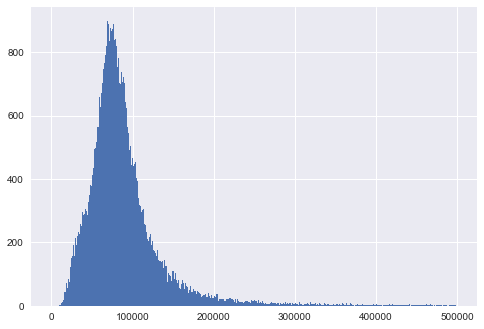

In [55]:
plt.hist(results['IntDen'], 500, range=(0, 500000));

In [89]:
results_grouped=results.groupby('labels')
means=results_grouped['IntDen'].mean()

In [95]:
myset = set(results['labels'])
print myset

set(['Carbo_10nM', 'FU_10nM', 'Carbo_100nM', 'Carbo_10uM', 'All_ctrl', 'Carbo_1uM', 'Pac_1uM', 'Pac_100nM', 'FU_10uM', 'Pac_10uM', 'FU_1uM', 'FU_100nM', 'Pac_10nM'])


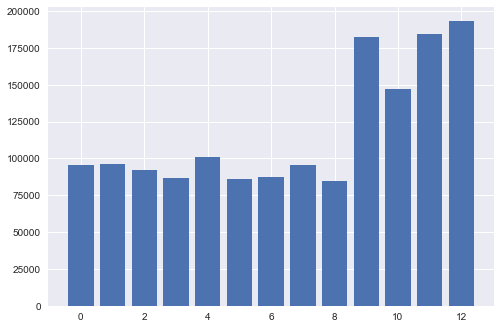

In [87]:
fig=plt.bar(range(len(results_grouped))
            , results_grouped['IntDen'].mean()
            #, tick_label=results_grouped['labels']
           )

# There's no obvious separation between positive and negative nuclei
- Upon further investigation, the dead cell stain is not necessarily in the nucleus
- Try to roughly segment cells and see if that will work